# GUILLET Axel (ROSE) / RAJAUD Eliott (CLBD)
DataMining

**Il y a des captures d'écrans disponibles dans le fichier qui permettent de visualiser une trace d'exécution des différentes cellules**

### Installation de webcolor pour pouvoir mettre des noms sur les couleurs que nous allons voir plus tard

In [ ]:
!pip install webcolors

### Appel des différentes bibliothèques que nous allons utiliser

In [ ]:
import os,sys
import json
from PIL import Image
import matplotlib
import matplotlib.pyplot as plot
import pandas as pd
from pandas import json_normalize
import numpy
import math
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from webcolors import CSS3_HEX_TO_NAMES, hex_to_rgb
from scipy.spatial import KDTree
import warnings
import random as rd
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


### Collecte des données

On télécharge les différentes images via un lien github que l'on place dans notre dossier images.

Ce sont bien des images sous licence libre (License CC0: Public Domain https://www.kaggle.com/datasets/akrsnv/catdog)


Enfin, on stock les métadonnées dans un fichier json (data.json).
Dans notre cas, on stocke dans un premier temps la classe (chien ou chat), un id, la taille, le format et le mode de l'image

On crée notre dossier images et on récupère les images via github.

On va exécuter la suite de commandes uniquement si le dossier images n'existe pas. Cela nous permettra de 'run all' sans avoir des duplications d'images et des tentatives de création de dossier alors que celui-ci existe déjà.

In [ ]:
!test ! -d images && (mkdir images; git clone https://github.com/Eliott-rjd/DataMining.git; mv DataMining/*.png images; rm -R DataMining)

In [ ]:
#Enregistrement des données en JSON
data=dict() #Initialisation du dictionnaire

with open('data.json', 'w') as mon_fichier: #Ouverture de notre fichier json (ou création s'il n'existe pas)
  for i in range(500):
    imgfile = Image.open("images/"+str(i)+".png") #Ouverture d'une image
    if(i<250):
      classe = "chat"
      id = i
    else:
      classe = "chien"
      id = i - 250

    data[i] = {
              "class": classe,
              "id" : id,
              "size": imgfile.size, #Récupération des métadonnées de l'image
              "format": imgfile.format,
              "mode": imgfile.mode,
          }
    print("image "+str(i)) #Affichage à l'écran pour voir la progression
  json.dump(data, mon_fichier, sort_keys=True, indent=4) #écriture des données dans le fichier json
mon_fichier.close() #fermeture du fichier json

image 0
image 1
image 2
image 3
image 4
image 5
image 6
image 7
image 8
image 9
image 10
image 11
image 12
image 13
image 14
image 15
image 16
image 17
image 18
image 19
image 20
image 21
image 22
image 23
image 24
image 25
image 26
image 27
image 28
image 29
image 30
image 31
image 32
image 33
image 34
image 35
image 36
image 37
image 38
image 39
image 40
image 41
image 42
image 43
image 44
image 45
image 46
image 47
image 48
image 49
image 50
image 51
image 52
image 53
image 54
image 55
image 56
image 57
image 58
image 59
image 60
image 61
image 62
image 63
image 64
image 65
image 66
image 67
image 68
image 69
image 70
image 71
image 72
image 73
image 74
image 75
image 76
image 77
image 78
image 79
image 80
image 81
image 82
image 83
image 84
image 85
image 86
image 87
image 88
image 89
image 90
image 91
image 92
image 93
image 94
image 95
image 96
image 97
image 98
image 99
image 100
image 101
image 102
image 103
image 104
image 105
image 106
image 107
image 108
image 109
image 110


**Aperçu du fichier json:**

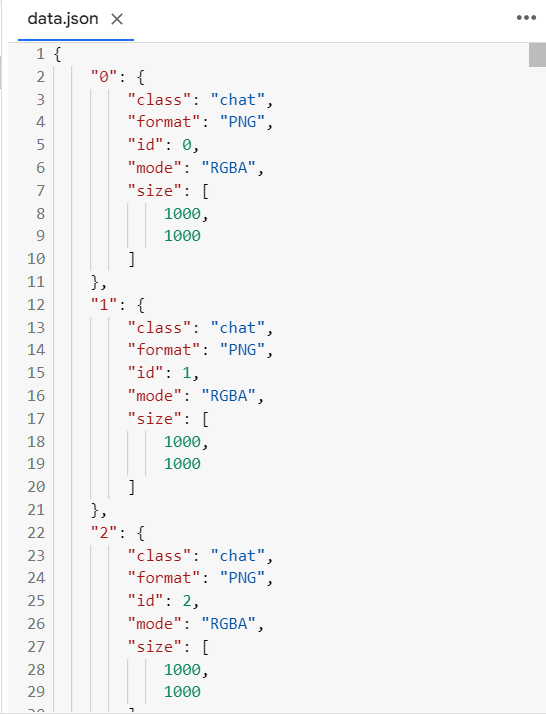


### Étiquetage et annotation

Nous allons utiliser un algorithme de regroupement afin de trouver les 2 couleurs prédominantes de chaque image. Nous utiliserons le MiniBatchKMeans pour gagner un peu de rapidité sur l'exécution.

Ensuite, nous stockerons ces infomrations dans le fichier json.data en faisant bien attention de récupérer les données déja initialisées pour ne pas les écraser.

Les tages chien ou chat ont déja été réalisés précedemment



#### Fonctions permettant de connaitre le nom des couleurs

In [ ]:
#Permet de retourner le nom de la couleur en fonction des valeurs RGB
def convert_rgb_to_names(rgb_tuple):

    # a dictionary of all the hex and their respective names in css3
    css3_db = CSS3_HEX_TO_NAMES
    names = []
    rgb_values = []
    for color_hex, color_name in css3_db.items():
        names.append(color_name)
        rgb_values.append(hex_to_rgb(color_hex))

    kdt_db = KDTree(rgb_values)
    distance, index = kdt_db.query(rgb_tuple)
    return names[index]


#Convertion hexadecimal à rgb pour pouvoir utilisé la fonction au dessus
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[k:k + lv // 3], 16) for k in range(0, lv, lv // 3))

#### Algorithme pour déterminer les 2 couleurs prédominantes des images

In [ ]:
# Utilise le MiniBatchKMeans pour retourner les 2 principales couleurs de l'image

with open('data.json', 'r') as mon_fichier: #On récupère les données du fichier json
  read = json.load(mon_fichier)
mon_fichier.close()

with open('data.json', 'w') as mon_fichier: #On réouvre ce fichier mais en mode écriture
  cluster_count = 2 #On va calculer les 2 couleurs prédominantes de chaque image

  for i in range(500):
    imgfile = Image.open("images/"+str(i)+".png") #Ouverture des images
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    clusters = MiniBatchKMeans(n_clusters = cluster_count) #MiniBatchKMeans (pour la rapidité)
    clusters.fit(numarray)

    nom_couleur = [] #Liste des couleurs
    for j in range(cluster_count):
        couleur = ('#%02x%02x%02x' % (
        math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
        math.ceil(clusters.cluster_centers_[j][2])))  #Couleurs en héxadécimale

        couleur_rgb = hex_to_rgb(couleur) #Converion en mode rgb
        nom_couleur.append(convert_rgb_to_names(couleur_rgb)) #Récupération du nom de la couleur

    read[str(i)]["couleur"] = nom_couleur #Ajout d'un champ "couleur" dans notre data.json
    print(i, nom_couleur) #Affichage pour visualiser l'avancée de l'éxecution
  json.dump(read, mon_fichier, indent=4) #écriture dans le json

mon_fichier.close() #fermeture du fichier

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/usr/lib/python3.7/inspect.py", line 1502, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, context)
  File "/usr/lib

FileNotFoundError: ignored

0 ['darkslategray', 'whitesmoke']
1 ['dimgray', 'gray']
2 ['white', 'gray']
3 ['black', 'white']
4 ['gray', 'lightgray']
5 ['white', 'saddlebrown']
6 ['whitesmoke', 'darkgray']
7 ['darkslategray', 'darkgray']
8 ['rosybrown', 'gainsboro']
9 ['dimgray', 'gray']
10 ['darkseagreen', 'darkolivegreen']
11 ['silver', 'gray']
12 ['dimgray', 'gray']
13 ['black', 'snow']
14 ['linen', 'darkslategray']
15 ['snow', 'darkolivegreen']
16 ['silver', 'black']
17 ['darkgray', 'gray']
18 ['whitesmoke', 'darkslategray']
19 ['dimgray', 'darkslategray']
20 ['seashell', 'darkolivegreen']
21 ['rosybrown', 'lightgray']
22 ['darkslategray', 'silver']
23 ['linen', 'gray']
24 ['white', 'dimgray']
25 ['gray', 'black']
26 ['silver', 'tan']
27 ['darkslategray', 'blanchedalmond']
28 ['darkgray', 'gray']
29 ['dimgray', 'rosybrown']
30 ['dimgray', 'white']
31 ['lightgray', 'silver']
32 ['gray', 'gray']
33 ['darkolivegreen', 'linen']
34 ['gainsboro', 'dimgray']
35 ['snow', 'darkolivegreen']
36 ['snow', 'darkslategray']


Notre fichier json.data a donc été édité avec les données suivantes:

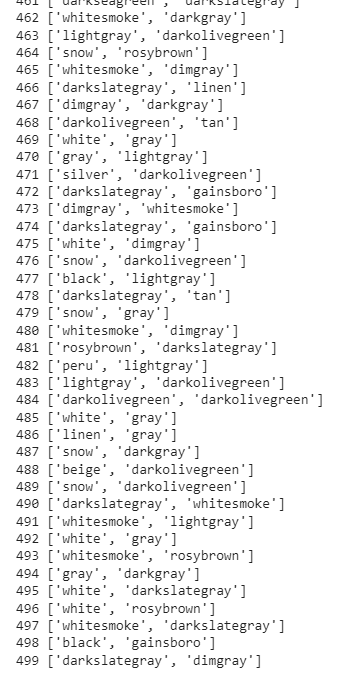


**Nouvelle apparence de notre fichier json.data:**

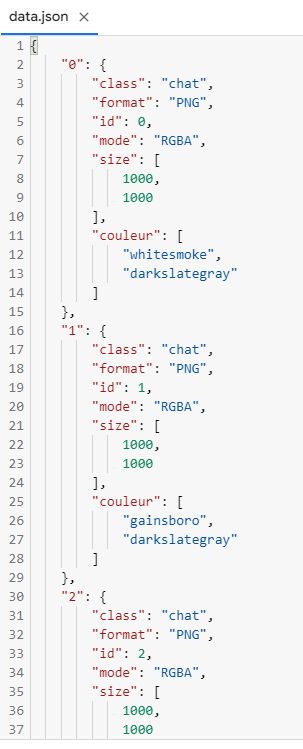

### Analyses de données

Dans le code ci-dessous, on crée un nombre aléatoire d'utilisateurs, qui eux-même attribuent ou non un Like à chacune de nos images aléatoirement.

Ensuite, on écrit dans des fichiers json toutes les données, un fichier qui stocke le nombre de Likes obtenus par chaque image et un second fichier qui stocke l'id de toutes les images Likées par chaque utilisateur, une séparation a été réalisée ente les Likes d'images de chiens et ceux d'images de chats.

Ainsi, en analysant les différentes images Likées par l'utilisateur (leur couleur, leur taille, l'animal...), on peut ainsi déterminer les préférences de l'utilisateur.

In [ ]:
#Pour chaque image, on veut trouver le nombre d'utilisateurs qui l'ont likés tandis
#que pour les utilisateurs, on veut savoir précisément quelles images ils ont likés
#ou quelles images ils ont taggés

Nb_image = 500
Nb_users =  rd.randint(100, 10**3)


NbLikeImage = []
for init in range(Nb_image):
  #On initialise le nombre de likes de chaque image à 0
  NbLikeImage.append(0)


UserIdImage = []
ImgTagChat = []
ImgTagChien = []
ImgTagColor = {}
for user in range(0,Nb_users):
  #images appréciées par chaque utilisateur
  LikedImages = []
  TagChienUser = []
  TagChatUser = []
  TagColorUser = {}
  # On utilise un dictionnaire pour TagColorUser pour pouvoir lier l'id de chaque
  #image aux couleurs préférées taggées par l'utilisateur. Les couleurs taggées
  #autorisées seront parmi les couleurs principales déterminées juste avant par
  #la méthode des Kmeans.
  for i in range(Nb_image):
    #probabilité d'un Like complètement random
    aimer = rd.random()
    proba = rd.random()*4
    if aimer < proba:
      like = 0
    else:
      like = 1
      LikedImages.append(i)
    NbLikeImage[i] += like

    tag_animal = rd.random()
    if tag_animal > 0.85:
      if i < Nb_image/2:
        # La première moitié des images étant des images de chats
        TagChatUser.append(i)
      else:
        TagChienUser.append(i)

    tag_color = rd.random()
    if tag_color > 0.9:
      with open('data.json', 'r') as dataImage: #Lecture des 2 couleurs majoritaires par images
        dataImages = json.load(dataImage)
      dataImage.close()
      majorColorList = dataImages[str(i)]["couleur"]

      #Deux couleurs taggées:
      if tag_color > 0.98:
        TagColorUser[i] = majorColorList
      #Une seule couleur n'est taggée par l'utilisateur:
      else:
        lonelyColor = []
        #On donne 3 fois plus de chances à la couleur principale d'être taggée que la seconde
        if tag_color > 0.92:
          lonelyColor.append(majorColorList[0])
        else:
          lonelyColor.append(majorColorList[1])
        TagColorUser[i] = lonelyColor

  #Pour chaque utilisateur, on ajoute les données des images Likées + taggées
  UserIdImage.append(LikedImages)
  ImgTagChat.append(TagChatUser)
  ImgTagChien.append(TagChienUser)
  ImgTagColor[user] = TagColorUser

print(NbLikeImage)
print(Nb_users)

#Ecriture sur LikeImages.json du nombre de Likes pour chaque image
data2 = dict()
with open('LikeImages.json', 'w') as mon_fichier2:
  for i in range(len(NbLikeImage)):
    if(i<250):
      data2[i] = {
                "class": "chat",
                "id" : i,
                "likes": NbLikeImage[i],
            }
    else:
      data2[i] = {
                "class": "chien",
                "id" : i,
                "likes": NbLikeImage[i],
            }

  json.dump(data2, mon_fichier2, sort_keys=True, indent=4)
  mon_fichier2.close()

#Ecriture sur LikeUsers.json des images Likées et taggées par chaque utilisateur
data3 = dict()
with open('LikeUsers.json', 'w') as mon_fichier3:
  for user in range(Nb_users):
    ImgChatLiked = []
    ImgChienLiked = []
    for val in UserIdImage[user]:
      #On différencie tout de suite les Likes sur les images de chiens et de chats
      if(val<250):
        ImgChatLiked.append(val)

      else:
        ImgChienLiked.append(val)

    data3[user] = {
              "idUser" : user,
              "like chat": ImgChatLiked,
              "like chien": ImgChienLiked,
              "tags": {
                "chien": ImgTagChien[user],
                "chat": ImgTagChat[user],
                "couleurs": ImgTagColor[user]
              }
          }

  json.dump(data3, mon_fichier3, sort_keys=True, indent=4)
  mon_fichier3.close()



[32, 43, 39, 46, 52, 29, 41, 38, 54, 39, 36, 30, 41, 34, 48, 45, 46, 40, 36, 38, 33, 41, 47, 57, 42, 48, 37, 42, 34, 55, 32, 35, 45, 34, 45, 38, 44, 42, 42, 40, 45, 37, 53, 53, 42, 38, 38, 34, 24, 41, 46, 37, 35, 37, 38, 49, 42, 30, 29, 39, 41, 44, 44, 41, 35, 40, 38, 36, 44, 29, 37, 30, 44, 47, 33, 45, 42, 29, 45, 48, 47, 42, 40, 45, 41, 34, 45, 35, 38, 34, 41, 39, 46, 37, 45, 39, 42, 50, 34, 57, 41, 42, 39, 39, 51, 45, 43, 32, 32, 36, 42, 34, 37, 48, 42, 32, 39, 34, 42, 38, 46, 34, 35, 42, 45, 39, 40, 36, 42, 42, 43, 41, 42, 41, 34, 38, 42, 30, 27, 37, 33, 41, 45, 35, 38, 37, 35, 43, 39, 49, 30, 42, 43, 44, 37, 44, 39, 39, 36, 41, 37, 32, 46, 43, 39, 42, 42, 43, 52, 32, 50, 48, 40, 45, 41, 43, 35, 37, 40, 42, 37, 39, 40, 38, 38, 30, 50, 36, 40, 36, 42, 38, 37, 32, 32, 40, 32, 30, 39, 31, 30, 38, 42, 31, 26, 39, 35, 31, 39, 28, 34, 42, 27, 36, 44, 33, 41, 33, 38, 37, 35, 29, 42, 37, 34, 44, 40, 29, 39, 39, 35, 30, 41, 40, 42, 44, 37, 51, 43, 40, 38, 29, 24, 36, 32, 36, 37, 53, 39, 30,

On récupère ainsi le nombre de likes pour chaque image et le nombre d'utilisateur (généré aléatoirement)

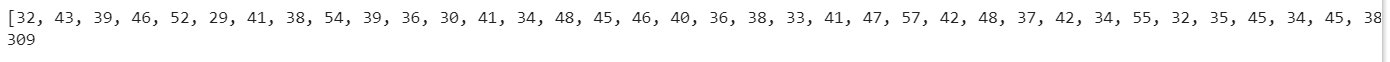

Voici un aperçu de ce qu'on obtient alors dans le fichier LikeUsers.json:


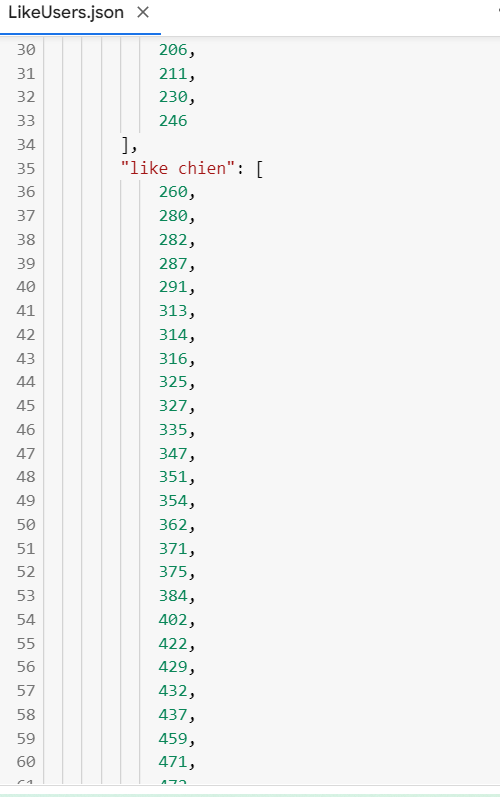

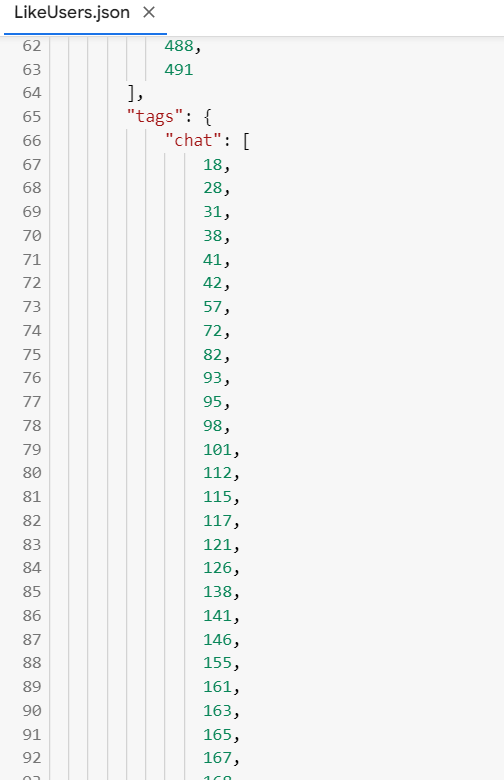

On stocke ainsi les IDs des différentes images de chiens et de chats Likées, ainsi que les IDs des images taggées en tant que chat, chien ou par couleurs présentes sur l'image.

Et voici un aperçu du résultat obtenu dans LikeImages.json:


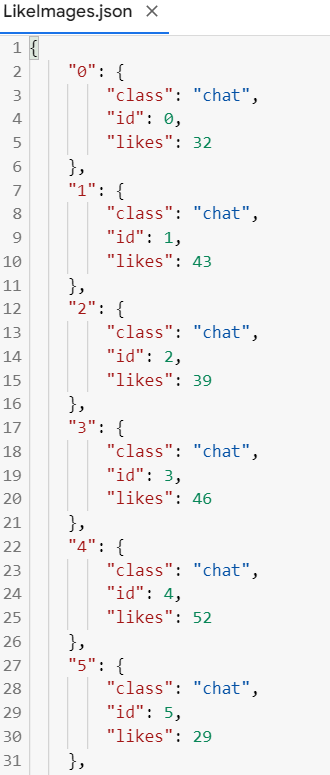

On stocke pour chaque image, son ID, sa classse ainsi que son nombre de Likes associés.



On va visualiser combien de fois apparaissent chaque couleur/combinaison de couleurs dans toutes les données. On affiche alors un tableau qui sépare chiens et chats et qui, pour chaque couleur principale (couleur 1), regarde les combinaisons de couleurs associées avec la couleur secondaire (couleur 2)

In [ ]:
#Teste les différentes combinaisons d'animaux et de couleurs obtenues, ainsi que
#le nombre de fois que chaque combinaison apparaît
data = json.load(open('data.json'))

array = []

for i in range(500):
  array.append([data[str(i)]["id"], data[str(i)]["class"], data[str(i)]["couleur"][0], data[str(i)]["couleur"][1]])

dataframe = pd.DataFrame(array,
      columns=['id', 'class', 'couleur1', 'couleur2'])
dataframe = dataframe.astype(dtype= {"id" : "int64", "class" : "<U200", "couleur1" : "<U200", "couleur2" : "<U200"})

grouped = dataframe.groupby(['class', 'couleur1', 'couleur2']).agg(['count'])
print(grouped)



                                     id
                                  count
class couleur1     couleur2            
chat  antiquewhite darkslategray      1
                   sienna             1
      beige        darkslategray      1
      bisque       gray               1
      black        gray               1
...                                 ...
chien whitesmoke   gray               6
                   lightgray          2
                   lightslategray     1
                   peru               1
                   sienna             2

[286 rows x 1 columns]


Le tableau ressemble à cela:

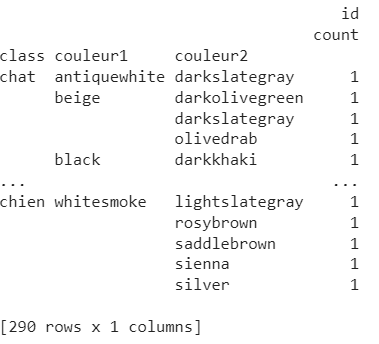

On va ici récupérer, pour chaque utilisateur, ses couleurs préférées et son animal préféré en récupérant les images qu'il a liké et en regardant les spécifités de ces images grâce aux données qu'on a stockées pour celles-ci

In [ ]:
with open('LikeUsers.json', 'r') as utilisateur: #Récupération des données utilisateurs
  user = json.load(utilisateur)
utilisateur.close()

with open('data.json', 'r') as dataImage: #Récupération des données de chaque images
  dataImages = json.load(dataImage)
dataImage.close()

CouleursPref_dico = dict() #Initialisation des dictionnaires
AnimalPref_dico = dict()
for i in range(Nb_users): #Parcours des utilisateurs
  CouleursPref = dict() #Remise à 0 des dictionnaires pour n'étudier qu'un seul utilisateur à la fois
  AnimalPref = dict()
  imageLike = [] #Remise à 0 des likes pour les utilisateurs suivants

  imageLike = user[str(i)]["like chat"]
  imageLike.extend(user[str(i)]["like chien"]) #Ajout dans une seule liste des indices des chiens et chats likés par l'utilisateur

  for val in imageLike: #On parcourt toutes les images likés l'utilisateur
    if(AnimalPref.get(dataImages[str(val)]["class"]) == None): #On regarde si la classe est déja dans celle du dictionnaire
      AnimalPref[dataImages[str(val)]["class"]] = 1 #Si elle n'y est pas on l'ajoute avec la valeur 1 (=apparu 1 fois)
    else:
      res = AnimalPref[dataImages[str(val)]["class"]] #Sinon on récupère la valeur de la classe (le nombre de fois qu'elle est apparue)
      res +=1 #On incrémente cette valeur de 1
      AnimalPref[dataImages[str(val)]["class"]] = res #On actualise la valeur

    for col in range(2):
      if(CouleursPref.get(dataImages[str(val)]["couleur"][col]) == None): #On fais de même pour voir combien de fois apparait chaque couleur
        CouleursPref[str(dataImages[str(val)]["couleur"][col])] = 1
      else:
        num = CouleursPref[str(dataImages[str(val)]["couleur"][col])]
        num +=1
        CouleursPref[str(dataImages[str(val)]["couleur"][col])] = num

  print(i) #Affichage des dictionnaires pour chaque utilisateurs
  print(CouleursPref)
  print(AnimalPref)

  CouleursPref_dico[i] = CouleursPref #Stockage dans un grand dictionnaire de toutes ces données par utilisateur
  AnimalPref_dico[i] = AnimalPref


0
{'white': 5, 'saddlebrown': 2, 'snow': 7, 'darkolivegreen': 8, 'darkgray': 7, 'gray': 10, 'palegoldenrod': 1, 'dimgray': 10, 'gainsboro': 2, 'silver': 8, 'whitesmoke': 10, 'darkslategray': 19, 'lightgray': 6, 'rosybrown': 7, 'peru': 1, 'bisque': 1, 'ghostwhite': 2, 'seashell': 1, 'antiquewhite': 1, 'lavender': 1, 'linen': 2, 'sienna': 1, 'lightsteelblue': 1, 'black': 1}
{'chat': 29, 'chien': 28}
1
{'dimgray': 13, 'gray': 11, 'linen': 6, 'darkslategray': 8, 'snow': 7, 'darkolivegreen': 13, 'darkgray': 3, 'rosybrown': 9, 'lightgray': 5, 'peru': 3, 'gainsboro': 6, 'whitesmoke': 5, 'white': 7, 'olivedrab': 1, 'silver': 6, 'sienna': 3, 'seashell': 1, 'lightslategray': 1, 'beige': 2, 'tan': 2, 'antiquewhite': 1, 'saddlebrown': 2, 'darkseagreen': 1, 'lavender': 1, 'lightsteelblue': 1}
{'chat': 29, 'chien': 30}
2
{'gray': 17, 'lightgray': 4, 'darkgray': 4, 'white': 8, 'dimgray': 12, 'rosybrown': 4, 'gainsboro': 11, 'tan': 1, 'black': 3, 'whitesmoke': 5, 'darkslategray': 9, 'darkgoldenrod': 1

Pour chaque utilisateur, on se retouve avec 2 dictionnaires avec les différentes données:

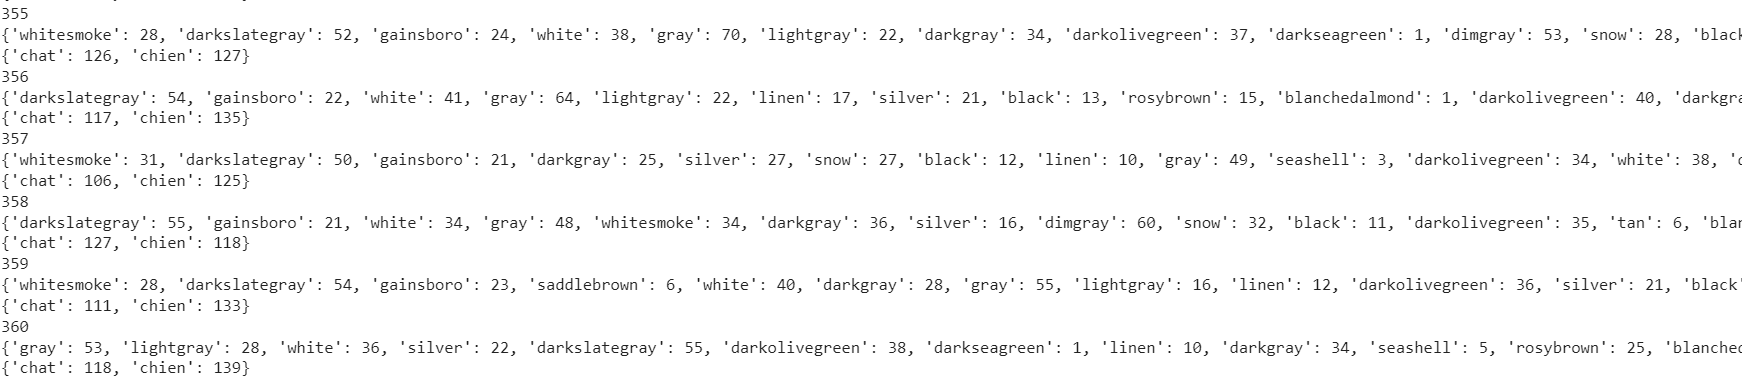


#### Visualisation des données

Nous allons ici visualiser les couleurs préférées des utilisateurs et leur animaux préférés en affichant un diagramme camembert avec la fréquence d'apparition des paramètres. Les couleurs seront affichés dans le diagramme avec leur nom et leur vraie couleur. Nous visualiserons aussi le nombre de like par images.

On va donc parcourir les données des utilisateurs et pour chaque image likée, voir quelles données lui sont associées.

(Dans notre cas, nous faisons le test avec un seul utilisateur sélectionné au hasard)

user 207
['gray', 'dimgray', 'white', 'darkolivegreen', 'darkslategray', 'gainsboro', 'darkgray', 'lightgray', 'whitesmoke', 'silver', 'snow', 'Autres couleurs']
['#808080', '#696969', '#FFFFFF', '#556B2F', '#2F4F4F', '#DCDCDC', '#A9A9A9', '#D3D3D3', '#F5F5F5', '#C0C0C0', '#FFFAFA', '#ABCDEF']


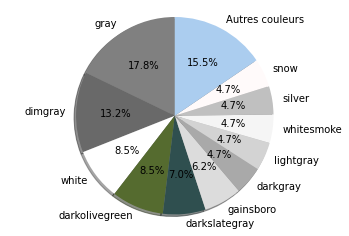

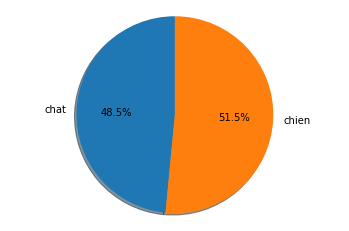

In [ ]:
#Le but est de tracer un camembert sur lequel sera représenté les couleurs
# préférées d'un utilisateur choisi au hasard.

user_visu = rd.randint(0,Nb_users -1)  #On sélectionne un utilisateur au hasard
print("user", user_visu)
#On classe les couleurs préférées de l'utilisateur par ordre de fréquence (sorted)
CouleursPrefUser = sorted(CouleursPref_dico[user_visu].items(), key=lambda t: t[1], reverse=True)

ColorKeys = []
ColorValues = []
ColorHex = []
Autres = 0
for col in range(len(CouleursPrefUser)):
  couleur = CouleursPrefUser[col]
  if int(couleur[1]) > 5:
    #Pour chaque couleur, on récupère son nom et sa fréquence associée
    ColorKeys.append(couleur[0])
    ColorValues.append(couleur[1])
    ColorHex.append(matplotlib.colors.cnames[ColorKeys[col]]) #On récupère le code héxa de la couleur grâce à son nom

  else:
    #Les couleurs les moins représentées seront affichées sur le graphe dans "Autres couleurs"
    if Autres == 0:
      Autres +=1
      ColorKeys.append("Autres couleurs")
      ColorValues.append(1)
    else:
      #Les couleurs ayant été classées par ordre de fréquence dès le départ (sort),
      #les dernières couleurs seront toutes associées à "Autres couleurs"
      ColorValues[-1] += couleur[1]

ColorHex.append('#ABCDEF') #Ajout d'une couleur spécifique pour l'intitulé "Autres couleurs"
print(ColorKeys)
print(ColorHex)

#Graphe couleurs préférées de l'utilisateur
plot.pie(ColorValues, labels=ColorKeys, autopct='%1.1f%%', shadow=True, startangle=90, colors=ColorHex)

plot.axis('equal')
plot.savefig('Couleurs_préférés.png')
plot.show()

#Graphe animal préféré
AnimalPrefUser = AnimalPref_dico[user_visu]
AnimalKeys = AnimalPrefUser.keys()
AnimalValue = AnimalPrefUser.values()

plot.pie(AnimalValue, labels=AnimalKeys, autopct='%1.1f%%', shadow=True, startangle=90)

plot.axis('equal')
plot.savefig('Animal_préférés.png')
plot.show()



**Résultat pour un utilisateur:**


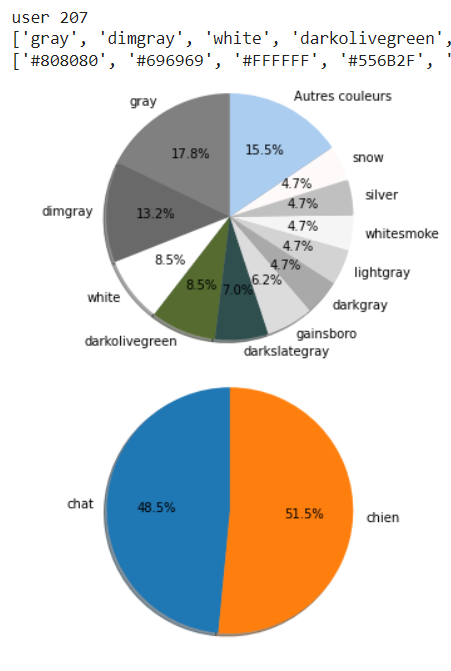

On veut aussi visualiser le nombre de Likes par image:

     likes
id        
0       32
1       43
2       39
3       46
4       52
..     ...
495     47
496     40
497     39
498     36
499     47

[500 rows x 1 columns]


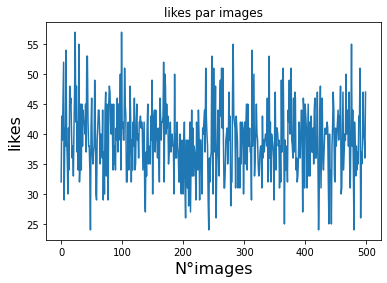

In [ ]:
data = json.load(open('LikeImages.json')) #Chargement des données
array = []

for i in range(500):
  array.append([data[str(i)]["id"], data[str(i)]["class"], data[str(i)]["likes"]]) #Récupération des données utiles

dataframe = pd.DataFrame(array,
      columns=['id', 'class', 'likes'])
dataframe = dataframe.astype(dtype= {"id" : "int64", "class" : "<U200", "likes" : "int64"})
grouped = dataframe.groupby(['id']).sum() #groupement par indices des images
print(grouped)
plot.plot(grouped)
plot.title("likes par images")
plot.xlabel('N°images',  fontsize=16)
plot.ylabel('likes',  fontsize=16)
plot.show() #Affichage du graphe


**Visualisation du nombre de like par images lors d'un test:**



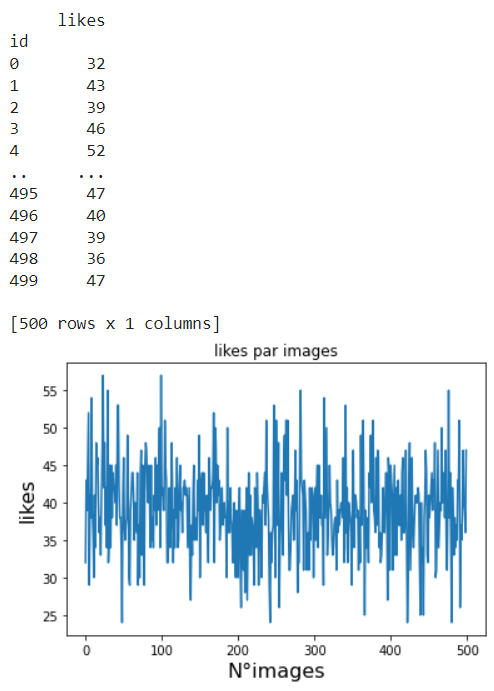

#### Système de recommandations

On va ici construire le sytème de recomandation en utilisant une classification avec un arbre de décisions.

On va donc faire apprendre à notre algorithme les images que l'utilisateur aime (en les récupérant dans le fichier json). Lorsqu'une images fait parti des images likées on ajoute 'Favoris' dans une liste. Si elle n'apparait pas, on ajoute 'NonFavoris'

On peut ensuite prédire si l'utilisateur aimera une image ou non selon la catégorie (chien ou chat) et les couleurs de l'image

['NonFavoris']
[0.09209829 0.42111758 0.48678413]


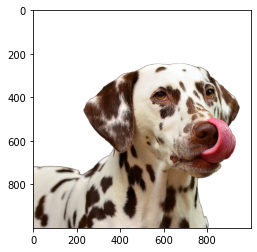

In [ ]:
warnings.filterwarnings('ignore')

#Prendre un seul utilisateur ici l'user aléatoire défini plus haut (Il suffirait de faire de même pour tous les autres utilisateur
# mais pour plus de clareté nous le faisons qu'avec un)
DonneeImage = []

with open('LikeUsers.json', 'r') as utilisateur:
  user = json.load(utilisateur)
utilisateur.close()

data = []
result = []
NonFav = []
with open('data.json', 'r') as mon_fichier: #On récupère les données du fichier json
  read = json.load(mon_fichier)
  for i in range(500):
    data.append([ read[str(i)]['class'],
                       read[str(i)]['couleur'][0], read[str(i)]['couleur'][1] ]) #On récupère que les 3 données utiles
    if( (i in (user[str(user_visu)]["like chat"]) or i in user[str(user_visu)]["like chien"]) ): #On regarde si l'indice de l'image est dans les images aimées par l'utilisateur
      result.append("Favoris")
      im1 = Image.open("images/"+str(i)+".png") #On va garder que la dernière images (ce n'est donc pas un problème que la valeur toujours écrite par dessus l'ancienne)
    else:
      NonFav.append(i) #On connait les indices des images aimées, mais on récupère celle non aimées pour plus tard
      result.append("NonFavoris")
    DonneeImage.append(read[str(i)])
mon_fichier.close()

#creating dataframes
dataframe = pd.DataFrame(data, columns=['class', 'couleur1', 'couleur2'])
resultframe = pd.DataFrame(result, columns=['favorite'])

#generating numerical labels
le1 = LabelEncoder()
dataframe['class'] = le1.fit_transform(dataframe['class'])

le2 = LabelEncoder()
dataframe['couleur1'] = le2.fit_transform(dataframe['couleur1'])

le3 = LabelEncoder()
dataframe['couleur2'] = le3.fit_transform(dataframe['couleur2'])

le4 = LabelEncoder()
resultframe['favorite'] = le4.fit_transform(resultframe['favorite'])

#Use of decision tree classifiers
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(dataframe, resultframe)

#prediction
prediction = dtc.predict([
        [le1.transform(['chat'])[0], le2.transform(['black'])[0],
         le3.transform(['blanchedalmond'])[0]]])
print(le4.inverse_transform(prediction))
print(dtc.feature_importances_)

plot.imshow(im1) #Affiche une des images likées


Par exemple, en mettant manuellement des tagues sur une prédiction, on peut voir si l'utilisateur aimerai cette images (si elle existe):

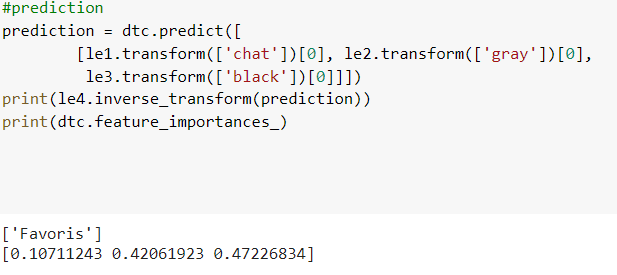



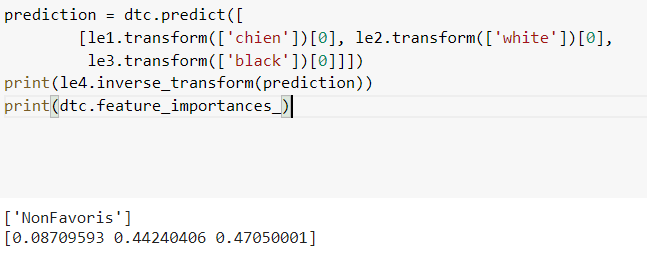

Mais on peut aussi regarder dans toutes les images non favorites celles qui pourraient plaire à l'utilisateur.
On va stocker les images recommandées pour en afficher une aléatoirement et voir après dans les tests, si elle correspond aux préférences de l'utilisateur

image: 0 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 1 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 3 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 4 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 5 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 6 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 7 ['Favoris']
[0.09209829 0.42111758 0.48678413]
image: 8 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 9 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 10 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 11 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 13 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 14 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 15 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 16 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 17 ['NonFavoris']
[0.09209829 0.42111758 0.48678413]
image: 18 ['NonFavoris']
[0.09209829 0.42111758 0.48

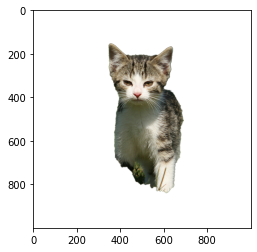

In [ ]:
affiche = 0 #On va afficher qu'une seule image
new = 0 #Le nombre de nouvelles images qu'il peut aimer
recommande = []
for i in NonFav:
  prediction = dtc.predict([
        [le1.transform([str(read[str(i)]['class'])])[0], le2.transform([str(read[str(i)]['couleur'][0])])[0],
         le3.transform([str(read[str(i)]['couleur'][1])])[0]]])

  if(le4.inverse_transform(prediction) == 'Favoris'):
    new += 1
    im2 = Image.open("images/"+str(i)+".png")
    recommande.append(im2)

  print("image:", i, le4.inverse_transform(prediction))
  print(dtc.feature_importances_)



print("\nIl y a ", new, " images recomandées sur les ",len(NonFav), " images non likées")
indice = rd.randint(0, len(recommande)-1)
print('\nUne des images recomandées: (numéro: ', indice, "):")

plot.imshow(recommande[indice]) #On affiche aléatoirement une des images recomandées


Dans toutes les images non likées, on voit bien que l'utilisateur peut possiblement être intéressé par certaines.


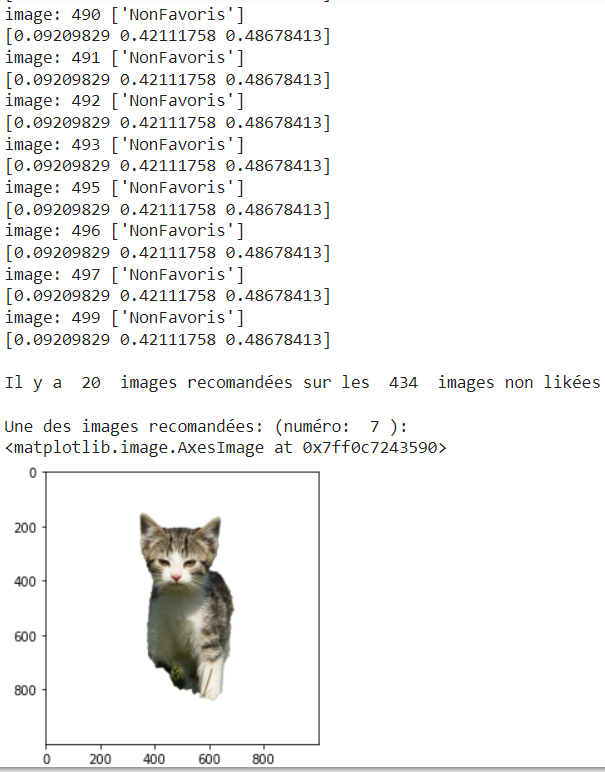

#### Test de la validité de la recommandation

Dans l'image choisit aléatoirement au-dessus (dans celles recommandées), on regarde les données liées à cette image, nottament les couleurs. (car pour le type d'animal cela est facile à visualiser).

On regarde la fréquence d'apparition des couleurs de l'images et on compare aux couleurs les plus aimées par ce même utilisateur.

Données liées à l'utilisateur:  207
{'white': 11, 'gray': 23, 'dimgray': 17, 'seashell': 2, 'darkolivegreen': 11, 'gainsboro': 8, 'darkgray': 6, 'rosybrown': 3, 'palegoldenrod': 2, 'lightgray': 6, 'peru': 4, 'tan': 1, 'whitesmoke': 6, 'darkkhaki': 1, 'saddlebrown': 3, 'ghostwhite': 1, 'darkslategray': 9, 'floralwhite': 1, 'black': 2, 'silver': 6, 'antiquewhite': 1, 'lightsteelblue': 1, 'snow': 6, 'linen': 1}
{'chat': 32, 'chien': 34}

Données images recommandée numéro:  9 
 {'class': 'chat', 'format': 'PNG', 'id': 9, 'mode': 'RGBA', 'size': [1000, 1000], 'couleur': ['dimgray', 'gray']}

Couleurs prédominantes  ['dimgray', 'gray']

Fréquence apparition des couleurs prédominantes de l'image recommandée: 
dimgray 17
gray 23
                quantité
couleur                 
darkolivegreen        11
darkslategray          9
dimgray               17
gainsboro              8
gray                  23
white                 11


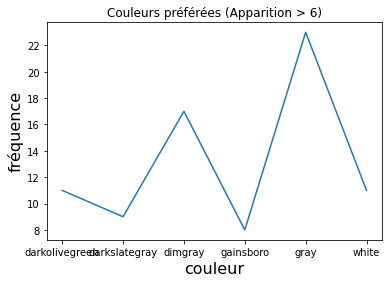

In [ ]:
print("Données liées à l'utilisateur: ",user_visu)
print(CouleursPref_dico[user_visu])
print(AnimalPref_dico[user_visu])

with open('data.json', 'r') as mon_fichier: #On récupère les données du fichier json
  test = json.load(mon_fichier)
mon_fichier.close()
print("\nDonnées image recommandée numéro: ",indice,"\n",test[str(indice)])

print("\nCouleurs prédominantes ",test[str(indice)]["couleur"])
print("\nFréquence apparition des couleurs prédominantes de l'image recommandée: ")
print(test[str(indice)]["couleur"][0],CouleursPref_dico[user_visu][test[str(indice)]["couleur"][0]])
print(test[str(indice)]["couleur"][1],CouleursPref_dico[user_visu][test[str(indice)]["couleur"][1]])

array = []
for key, value in CouleursPref_dico[user_visu].items():
  if(value > 6):
     array.append([key, value]) #Récupération des données utiles


dataframe = pd.DataFrame(array,
      columns=['couleur', 'quantité'])
dataframe = dataframe.astype(dtype= {"couleur" : "<U200", "quantité" : "int64"})
grouped = dataframe.groupby(['couleur']).sum() #groupement par indices des images
print(grouped)

plot.plot(grouped)
plot.title("Couleurs préférées (Apparition > 6)")
plot.xlabel('couleur',  fontsize=16)
plot.ylabel('fréquence',  fontsize=16)
plot.show() #Affichage du graphe


Résultat pour une image recommandée:


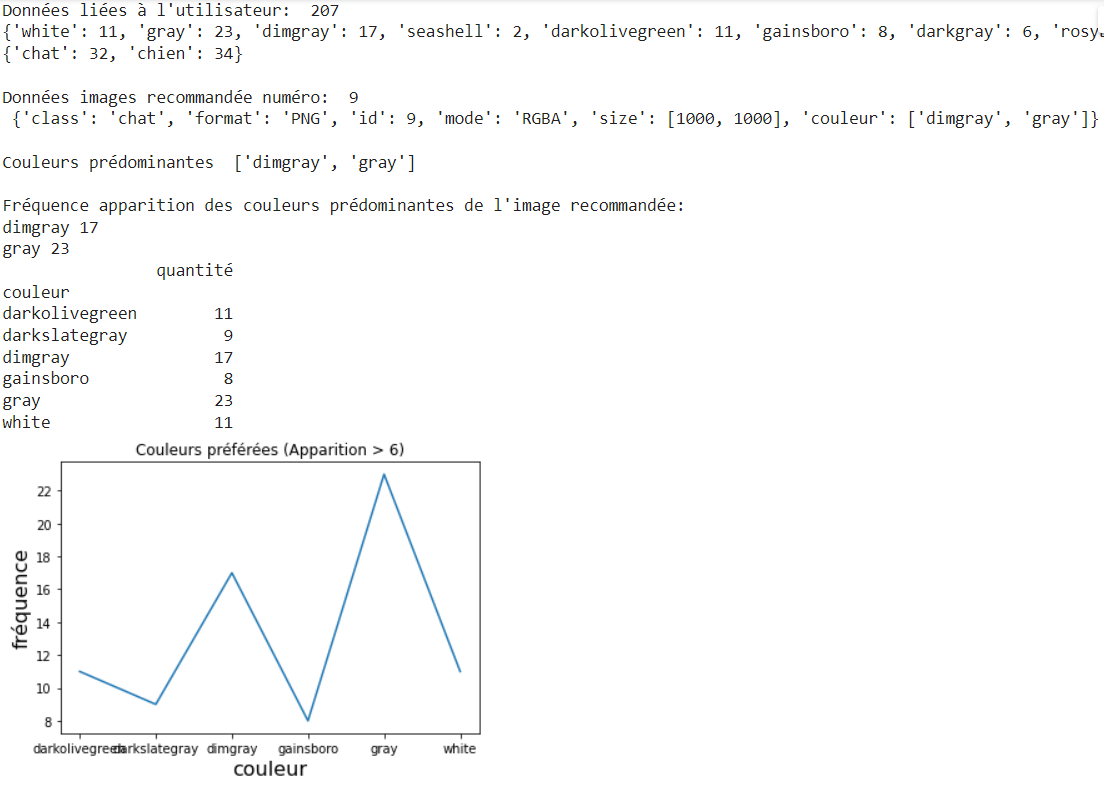